#### Import necessary libary

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#### Read all file data

In [3]:
#read all file in project_7
Data_2010 = pd.read_csv(r'2010.csv')
Data_2011 = pd.read_csv(r'2011.csv')
Data_2012 = pd.read_csv(r'2012.csv')
Data_2013 = pd.read_csv(r'2013.csv')
Data_2014 = pd.read_csv(r'2014.csv')
Data_2015 = pd.read_csv(r'2015.csv')
Data_2016 = pd.read_csv(r'2016.csv')
Data_2017 = pd.read_csv(r'2017.csv')
Data_2018 = pd.read_csv(r'2018.csv')
Data_2019 = pd.read_csv(r'2019.csv')

#### 1. Combine all data file into 'top_spotify_songs' dataframe and create a file 'top_spotify_songs.csv'

In [12]:
'''1. Combine all file in to one dataframe top_spotify_songs'''
# Combine all data into 1 dataframe
top_spotify_songs = pd.concat([Data_2010,Data_2011,Data_2012,Data_2013,Data_2014,
                               Data_2015,Data_2016,Data_2017,Data_2018,Data_2019], ignore_index=True, sort=False)
# And rename column Unnamed: 0' to 'Id'
top_spotify_songs.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
top_spotify_songs

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [13]:
'''1. Create a file top_spotify_songs.csv'''
# Create a file top_spotify_songs.csv
top_spotify_songs.to_csv('top_spotify_songs.csv', index = True)

#### 2. Check the data type

In [14]:
'''2. Check data type are numberic'''
top_spotify_songs.dtypes
# You can see except column 'title', 'artist' and 'top genner' all the remaining columns have data type 'int64'

Id            int64
title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

#### 3. What is the most popular song in the dataset?
Frist, I want to check the number of max count after sorting data by 'Id' column to avoid 2 or more songs have the same values but the resault only display only 1
Then, I display all the top name song below according to the 'max count' value

In [18]:
''' 3. What is the most popular song in the dataset?'''

most_popular = top_spotify_songs.sort_values(by=['pop'], ascending=False)
most_popular.head(1)

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
572,573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99


#### 4. What artist has the most songs in the dataset?
I want to answear this question into 2 part, the query method and create a chart method
With query method, I have the same code writing in question 3 above to find the most popular artist's name
With display chart method, I use bar chart and to show the top number of song make by artist's name

In [20]:
'''4. What artist has the most songs in the dataset?'''
'''With query'''
# Group data by artist's name to count the most popular song
Count_Most_Artist = top_spotify_songs.groupby('artist').count().sort_values(by = 'Id', ascending = False)
# Check the max number of group data by'Id' column
Max_Count = Count_Most_Artist.Id.max()

# Display the most popular artist's name in dataset
List_Most_Popular_Songs = Count_Most_Artist[Count_Most_Artist.Id == Max_Count].index
print('''The most popular artist's name I can show below is''')
for song in List_Most_Popular_Songs: 
    print(song)

The most popular artist's name I can show below is
Katy Perry


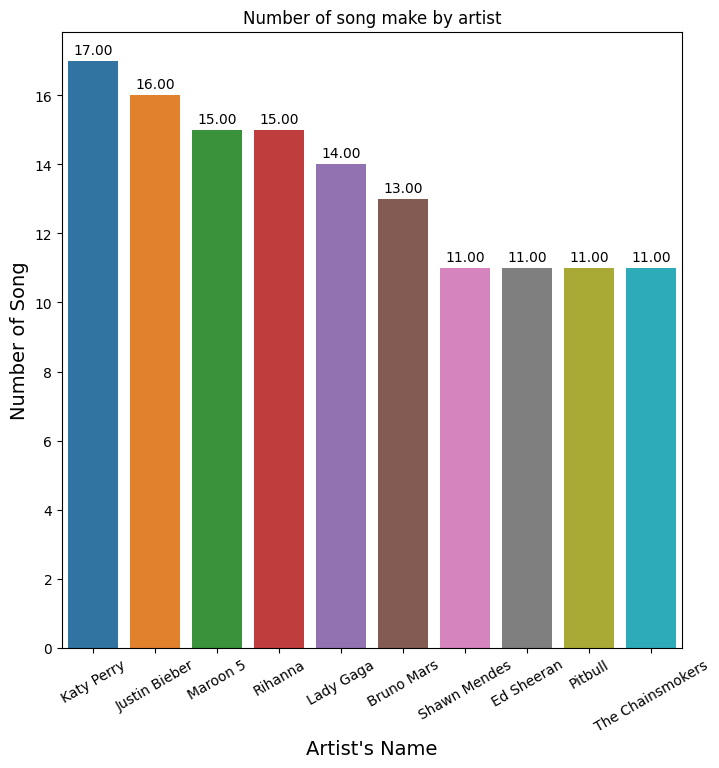

In [23]:
'''4.What artist has the most songs in the dataset?'''
'''With bar chart'''
ShortCount_Most_Artist = Count_Most_Artist[['Id']].head(10)
ShortCount_Most_Artist = ShortCount_Most_Artist.reset_index()
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sb.barplot(x='artist', y='Id', data=ShortCount_Most_Artist)
 
# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
# Setting the label for x-axis
plt.xlabel("Artist's Name", size=14)
plt.xticks(rotation=30)
 
# Setting the label for y-axis
plt.ylabel("Number of Song", size=14)
 
# Setting the title for the graph
plt.title("Number of song make by artist")
 
# Finally showing the plot
plt.show()

#### 5. What is the most popular genre of music in the dataset?
Similar to the question 4 above, I create a 2 part to show the resault
The first to answear the most popular gener name
The second to show the barchart similar to question number 4

In [24]:
'''5. What is the most popular genre of music in the dataset?'''
'''With query'''
# Group data by top genre to count the most popular song
Count_Most_Topgenre = top_spotify_songs.groupby('top genre').count().sort_values(by = 'Id', ascending = False)
# Check the max number of group data by'Id' column
Max_Count = Count_Most_Topgenre.Id.max()

# Display the most popular artist's name in dataset
List_Most_Popular_Songs = Count_Most_Topgenre[Count_Most_Topgenre.Id == Max_Count]
print('''The most popular gener name I can show is''', List_Most_Popular_Songs.index[0])

The most popular gener name I can show is dance pop


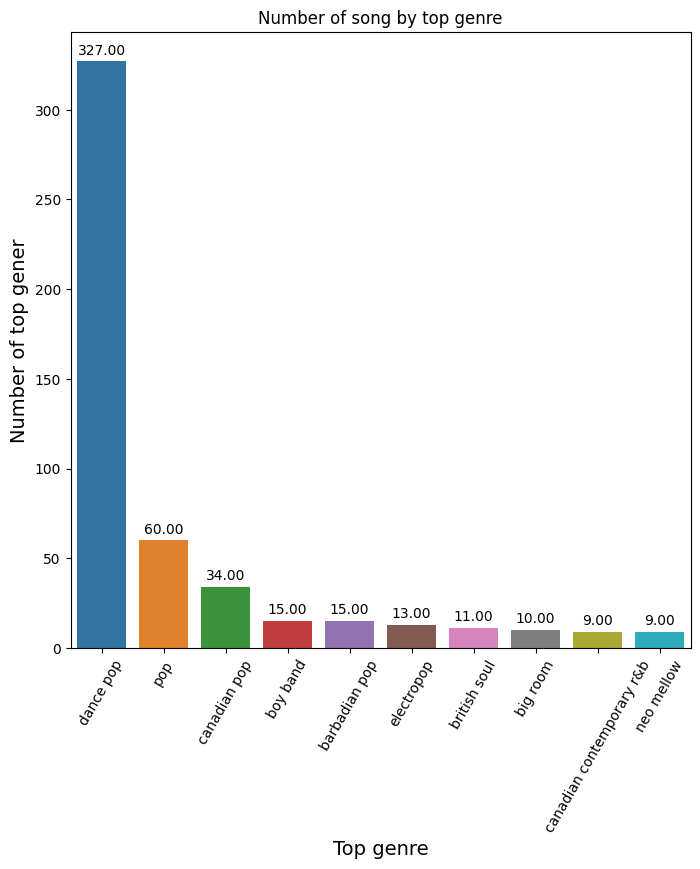

In [11]:
'''5.What is the most popular genre of music in the dataset?'''
'''With bar chart'''
ShortCount_Most_Topgenre = Count_Most_Topgenre[['Id']].head(10)
ShortCount_Most_Topgenre = ShortCount_Most_Topgenre.reset_index()
plt.figure(figsize=(8, 8))

plots = sb.barplot(x='top genre', y='Id', data=ShortCount_Most_Topgenre)
 
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xlabel("Top genre", size=14)
plt.xticks(rotation=60)
plt.ylabel("Number of top gener", size=14)
plt.title("Number of song by top genre")
plt.show()

####  6. Are there any songs in the dataset more than once?
In this question, I want to group data to count the number of song by 'Id' coulmn and display the resault the song's name have values greater than 2

In [12]:
''' 6. Are there any songs in the dataset more than once?'''
# Group data by song's name to count the most popular song by 'Id'
Count_Most_Popular = top_spotify_songs.groupby('title').count().sort_values(by = 'Id', ascending = False).Id

# Display the most popular name songs in dataset
List_Most_Popular_Songs = Count_Most_Popular[Count_Most_Popular >= 2].count()
print('There are ', List_Most_Popular_Songs, 'songs in the dataset more than once')

There are  19 songs in the dataset more than once


#### 7. Is there a relationship between popularity and danceability?
To answear this question, I create a scatter plot to see the relationship between popularity values and danceability values. 
<br>You can see this relationship is not strong between popularity values and danceability values  

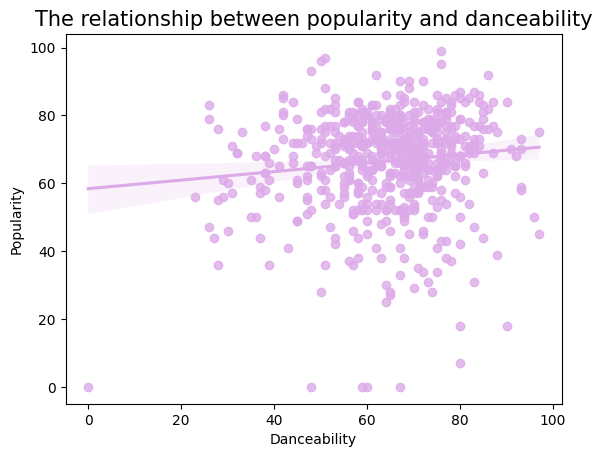

In [30]:
'''7. Is there a relationship between popularity and danceability?'''
sb.regplot(data = top_spotify_songs, x='dnce', y='pop', color="#DDAAE9")
plt.title('The relationship between popularity and danceability', fontsize = 15)
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

#### 8. Does having a higher bpm lead to having a higher energy score?
To answear this question, I also using the scatter plot to show the relationship between bpm values and enerfy score values.
<br> As you can see, this is hardly to tell that bpm values and energy score have relationship
<br> because the regression nearly resembles the x-axis but with a constant of 100

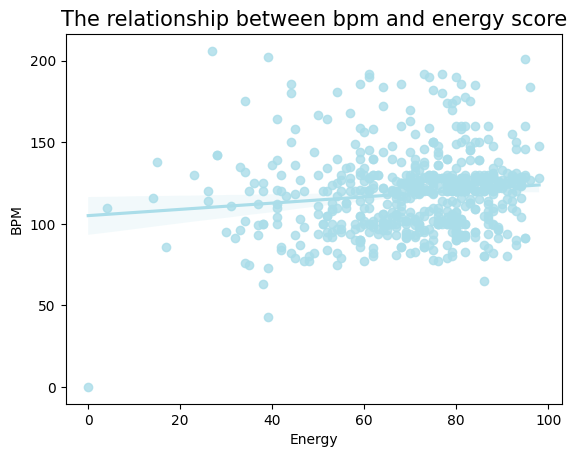

In [36]:
'''8. Does having a higher bpm lead to having a higher energy score?'''

sb.regplot(data = top_spotify_songs, x='nrgy', y='bpm', color="#AADDE9")
plt.title('The relationship between bpm and energy score', fontsize = 15)
plt.xlabel("Energy")
plt.ylabel("BPM")
plt.show()

#### 9. Which genre has the highest energy score?
In this question, I want to answear in 2 part, query method and create a chart to show the top energy score

In the query method, I want to count the number of song in each genre and the total energy score to calculate the average of energy score
<br> Then I choose the top averge of energy score by sort values

In the visualization part, I choose the bar chart to show the top averge of energy score 

In [37]:
'''9. Which genre has the highest energy score?'''
''' With query'''
# Get data column 'Id' to see the total number of songs
Count_Number_Each_Genre = top_spotify_songs.groupby('top genre').count().Id
# Get data column 'top genre' to see the total of each genre energy socre 
Total_Energy_Score = top_spotify_songs.groupby('top genre').sum().nrgy
# Interection 2 data frame
Data_10 = pd.concat([Count_Number_Each_Genre,Total_Energy_Score],join ='inner',axis=1)
# And rename column 
New_Data_10 = Data_10.rename(columns = {'Id':'Number_of_Songs','nrgy':'Energy_Socre'})
# Calculate the averge of energy score each genre
New_Data_10['Averge_of_Energy_Score'] = round(New_Data_10['Energy_Socre'] / New_Data_10['Number_of_Songs'],2)
# And sorting data by Averge_of_Energy_Score column
New_Data_10 = New_Data_10.sort_values(by = 'Averge_of_Energy_Score', ascending = False)
print('Top genre have the highest averge energy score is', New_Data_10.index[0])

Top genre have the highest averge energy score is french indie pop


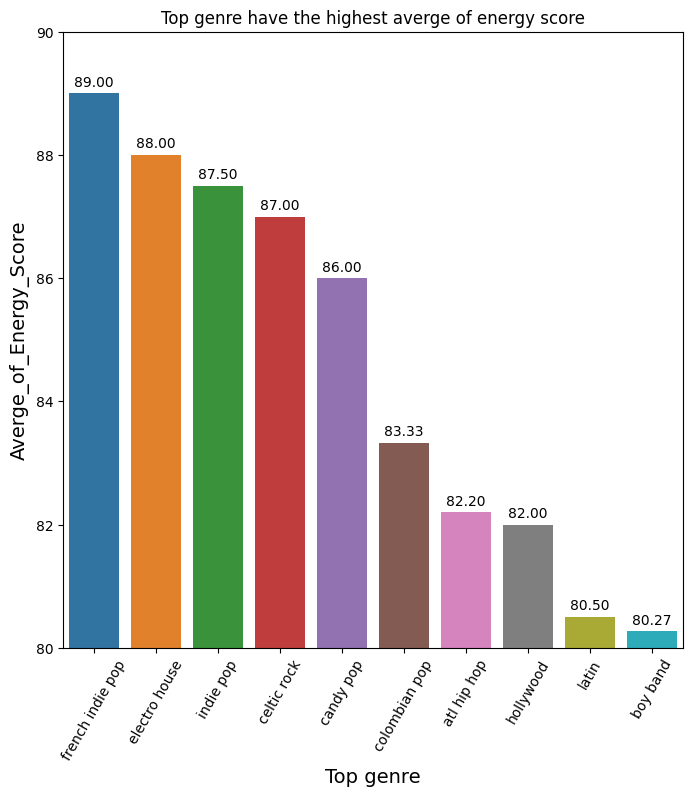

In [38]:
'''9. Which genre has the highest energy score?'''
''' With barchart'''

New_Data_10 = New_Data_10.reset_index().head(10)
plt.figure(figsize=(8, 8))

plots = sb.barplot(x='top genre', y='Averge_of_Energy_Score', data=New_Data_10)
 
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xlabel("Top genre", size=14)
plt.xticks(rotation=60)
plt.ylabel("Averge_of_Energy_Score", size=14)
plt.title("Top genre have the highest averge of energy score")
plt.ylim(80, 90)
plt.show()

#### Extra 2.What percentage of songs may have been recorded live? (Consider anything above 50 in the live column to be recorded live)
In this question, I calculate the precentage of data have been recorded live by filter the column 'live' value is >= 50 and round the number by 2 decimal number

In [39]:
'''Extra 2. What percentage of songs may have been recorded live? (Consider anything above 50 in the live column to be recorded live)'''
print('There are',round(100 / top_spotify_songs.shape[0] * top_spotify_songs[top_spotify_songs['live'] >= 50].shape[0],2),
      '% in data have been recorded live')

There are 2.99 % in data have been recorded live


#### Extra 3.What percentage of songs were acoustic? (Consider anything above 50 in the acoustic column to be acoustic)
In this question, I calculate the precentage of data have been recorded live by filter the column 'acous' value is >= 50 and round the number by 2 decimal number. Similar to Extra question 2

In [43]:
'''Extra 3.What percentage of songs were acoustic? (Consider anything above 50 in the acoustic column to be acoustic)'''
print('There are',round(100 / top_spotify_songs.shape[0] * top_spotify_songs[top_spotify_songs['acous'] >= 50].shape[0],2),
      '% in data have been recorded live')

There are 7.63 % in data have been recorded live


#### Extra 4. Which year’s songs have the highest amount of spoken word in the song?
To solving this question, I groupby data by year with sum method and sort data

In [55]:
extra4 = top_spotify_songs[['year', 'spch']].groupby('year').sum()
extra4  = extra4.sort_values('spch', ascending=False)
print('year',extra4.head(1).index[0], 'have the highest amount of spoken word in the song')

year 2015 have the highest amount of spoken word in the song
